In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Specify the directory where the file is located
directory = "../data/processed"

# Find the file with the specific name pattern
filename = next(f for f in os.listdir(directory) if f.startswith("may_time_cleaned"))

# Construct the full file path
file_path = os.path.join(directory, filename)

# Read the file using pandas
df_may = pd.read_parquet(file_path)

In [5]:
print('The shape of the dataframe is', df_may.shape)
print('The name of the columns of the dataframe are', df_may.columns)

The shape of the dataframe is (3452950, 20)
The name of the columns of the dataframe are Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'diff_time'],
      dtype='object')


In [6]:
df_may.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,diff_time
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.10,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.00,0.3,20.80,2.5,0.0,0 days 00:18:42
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.30,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.00,0.3,14.80,2.5,0.0,0 days 00:13:49
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.20,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.00,0.3,19.30,2.5,0.0,0 days 00:15:22
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.00,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.00,0.3,42.00,0.0,0.0,0 days 00:39:44
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.60,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.00,0.3,13.55,2.5,0.0,0 days 00:09:23
5,2,2022-04-30 23:53:47,2022-05-01 00:05:17,1.0,1.87,1.0,N,249,164,1,9.5,0.5,0.5,2.66,0.00,0.3,15.96,2.5,0.0,0 days 00:11:30
6,2,2022-05-01 00:07:11,2022-05-01 00:19:24,1.0,3.35,1.0,N,164,112,1,12.5,0.5,0.5,3.43,6.55,0.3,26.28,2.5,0.0,0 days 00:12:13
7,2,2022-05-01 00:14:38,2022-05-01 00:33:09,2.0,2.58,1.0,N,79,68,1,13.0,0.5,0.5,3.36,0.00,0.3,20.16,2.5,0.0,0 days 00:18:31
8,2,2022-05-01 00:36:36,2022-05-01 01:07:08,1.0,4.55,1.0,N,68,87,1,20.5,0.5,0.5,4.86,0.00,0.3,29.16,2.5,0.0,0 days 00:30:32
9,1,2022-05-01 00:17:43,2022-05-01 00:30:32,0.0,2.70,1.0,N,48,145,1,11.5,3.0,0.5,2.00,0.00,0.3,17.30,2.5,0.0,0 days 00:12:49


In [10]:
df_may['PULocationID'].value_counts()

PULocationID
132    174870
237    170622
236    148771
161    136281
142    117273
        ...  
187         1
105         1
84          1
221         1
199         1
Name: count, Length: 258, dtype: int64

We have 258 different locations where the trips begin

In [11]:
df_may['DOLocationID'].value_counts()

DOLocationID
236    151749
237    147355
161    127351
230    103585
170     99929
        ...  
187        17
84         17
176        16
2           5
105         3
Name: count, Length: 260, dtype: int64

We have 260 different locations where the trips end. 

In [12]:
df_may['trip_distance'].describe()

count    3.452950e+06
mean     3.598742e+00
std      1.774139e+01
min      0.000000e+00
25%      1.120000e+00
50%      1.900000e+00
75%      3.600000e+00
max      2.944565e+04
Name: trip_distance, dtype: float64

The description of the column 'trip_distance' suggest us the existence of outliers, since the $Q_3$ metric has a much less order than the maximum reported. In order to determine all the outliers present in the data, we apply the three sigma rule. the next cell resume our findings

In [18]:
mean = df_may['trip_distance'].mean()
std_dev = df_may['trip_distance'].std()

# Define the bounds
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Filter the dataframe
df_outliers_down = df_may[(df_may['trip_distance'] < lower_bound)]
df_outliers_up = df_may[(df_may['trip_distance'] > upper_bound)]
print(f'There are {df_outliers_down.shape[0]} lower outliers and {df_outliers_up.shape[0]} upper outliers')


There are 0 lower outliers and 207 upper outliers


For a quick review of the upper outliers, we present a description for df_outliers_up

In [20]:
df_outliers_up['trip_distance'].describe()

count      207.000000
mean       320.942609
std       2198.190006
min         56.850000
25%         59.280000
50%         64.170000
75%         71.560000
max      29445.650000
Name: trip_distance, dtype: float64

We clean the dataset from these outliers:

In [40]:
df_may = df_may[(df_may['trip_distance'] >= lower_bound) & (df_may['trip_distance'] <= upper_bound)]

Now, we are interested in finding out if there exist trips that begin and end in the same location. The following cell tell us that, in fact, this fact happens.

In [41]:
a = (df_may['PULocationID']==df_may['DOLocationID']).value_counts()
print(f'There are {a.iloc[0]} trips from two different locations, and {a.iloc[1]} from the same locations')

There are 3278159 trips from two different locations, and 174584 from the same locations


For this particular month, the percentage of trips made in the same location is $5.325672\%$. Now, we are interested in the number of trips made inside a location, and moreover, if the reported trips are more or less uniformly distributed. The following cell resumes this fact

In [42]:
df_trips_outside = df_may[df_may['PULocationID']!=df_may['DOLocationID']]
df_trips_inside =  df_may[df_may['PULocationID']==df_may['DOLocationID']] 


df_summary_inside = df_trips_inside.groupby('PULocationID').agg(
    number_of_trips=('PULocationID', 'size'),      # Count the number of trips
    total_fare_amount=('fare_amount', 'sum'),     # Sum of fare amounts
    total_distance=('trip_distance', 'sum')       # Sum of distances
).reset_index()


print(df_summary_inside)


     PULocationID  number_of_trips  total_fare_amount  total_distance
0               1              970           81659.12          578.76
1               3                6             226.70           13.64
2               4              124            1766.22           75.92
3               5                1             170.00            0.00
4               6                2              21.45           12.22
..            ...              ...                ...             ...
238           261              373            6637.73          356.48
239           262             1628           12211.69         1224.20
240           263             3313           19861.45         2312.27
241           264            18706          339357.90        59983.36
242           265             1765          163206.66         2448.65

[243 rows x 4 columns]


In [43]:
df_summary_inside['number_of_trips'].describe()

count      243.000000
mean       718.452675
std       2147.012890
min          1.000000
25%          8.000000
50%         23.000000
75%        207.000000
max      18706.000000
Name: number_of_trips, dtype: float64

From the data above, we conclude that the number of trips are very disperse because of the standar deviation metric. Evenmore, although there are 260 locations, we have information of inside trips for 243 ones, so we do not known what happens inside the other 17 locations.

Respect to the trips between two different locations, the stadistics are the following:

In [54]:
df_summary_outside = df_trips_outside['PULocationID'].value_counts()

df_summary_outside.shape

(257,)

In [50]:
df_summary_outside = df_trips_outside['DOLocationID'].value_counts()

df_summary_outside.shape

(260,)

The discrepance between the last two numbers show us that exist information for trips that begin in 257 locations and end in any of the 260 locations; therefore, we do not have information for trips begin in any of the locations, only for 257 of them.

We present an histogram of number of trips begin from a set of locations:

     PULocationID   count
0             132  165442
1             237  154864
2             236  134186
3             161  130905
4             142  112521
..            ...     ...
252            84       1
253           176       1
254           105       1
255           221       1
256           199       1

[257 rows x 2 columns]


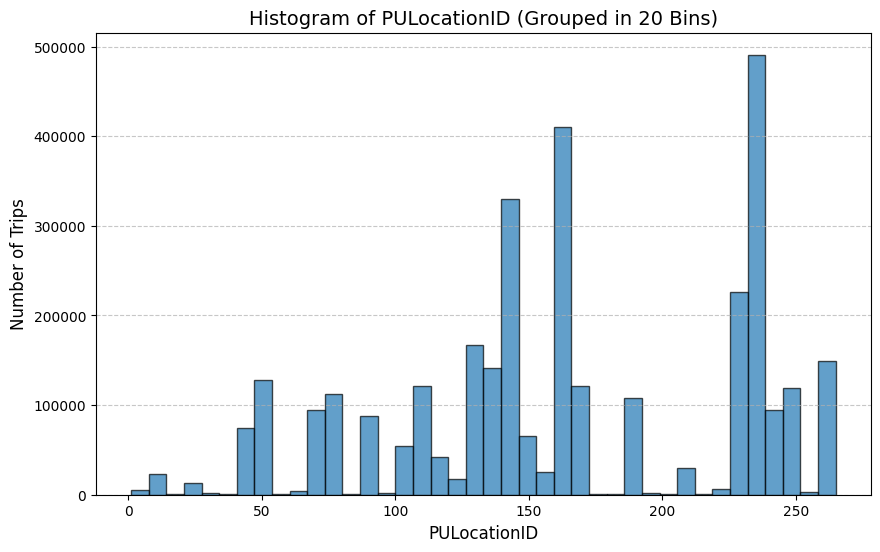

In [57]:
df_summary_outside = df_trips_outside['PULocationID'].value_counts().reset_index()

# Renaming the columns for clarity
df_summary_outside.columns = ['PULocationID', 'count']

# Displaying the resulting DataFrame
print(df_summary_outside)

plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df_trips_outside['PULocationID'], bins=40, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('PULocationID', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Histogram of PULocationID (Grouped in 20 Bins)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the histogram
plt.show()

     DOLocationID   count
0             236  137165
1             237  131599
2             161  121975
3             230   99635
4             170   96182
..            ...     ...
255           187      17
256            84      17
257           176      15
258             2       5
259           105       3

[260 rows x 2 columns]


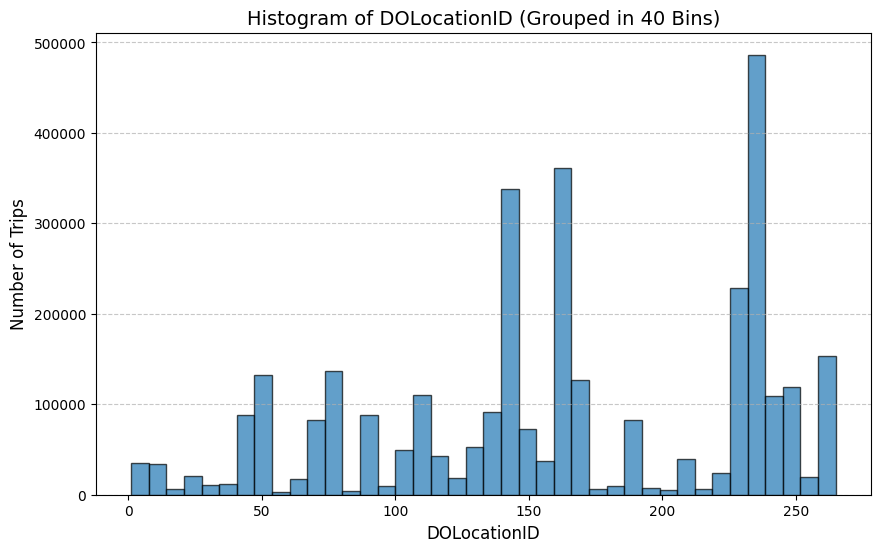

In [58]:
# Calculate value counts for DOLocationID
df_summary_outside_DO = df_trips_outside['DOLocationID'].value_counts().reset_index()

# Renaming the columns for clarity
df_summary_outside_DO.columns = ['DOLocationID', 'count']

# Displaying the resulting DataFrame
print(df_summary_outside_DO)

# Create the histogram for DOLocationID
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df_trips_outside['DOLocationID'], bins=40, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('DOLocationID', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Histogram of DOLocationID (Grouped in 40 Bins)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the histogram
plt.show()


We save the cleaned data without outliers:

In [59]:
original_columns = df_may.columns

df_may_cleaned = df_may[original_columns]

output_dir = "../data/processed"
output_file = "may_spatial_cleaned.parquet"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the DataFrame in Parquet format
df_may_cleaned.to_parquet(os.path.join(output_dir, output_file), index=False)